In [ ]:
import pickle
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as onp
import immrax as irx
from immrax.utils import angular_sweep

In [136]:
traj = pickle.load(open('sample_traj_9_euler-1.27.pkl', 'rb'))
# traj = pickle.load(open('sample_traj_9_rk45-1.18.pkl', 'rb'))
print(traj[-2:])
final_good_t = len(traj) - 2

[[ 0.7406016   1.2145289   1.1146313   1.3659936   1.4754686   1.4402386
  1.262096    1.0755891   0.71189183  0.26629758 -0.21858752 -0.69996136] <= x <= [ 1.0863425e+00  1.5749937e+00  1.4235668e+00  1.6772064e+00
  1.8277982e+00  1.8547524e+00  6.9247593e+33  1.4246482e+00
  1.0598278e+00  6.3463891e-01  1.8195422e-01 -2.6064029e-01], [ 0.73183805  1.2230443   1.1087567   1.3635112   1.4764313   1.4443139
  1.26856     1.0851482   0.72272     0.27736297 -0.20835347 -0.69157076] <= x <= [ 1.079995    1.5847294   1.4199986   1.6768168   1.8307141   1.8609788
         nan  1.4353013   1.0718305   0.6471594   0.19423118 -0.24903536]]


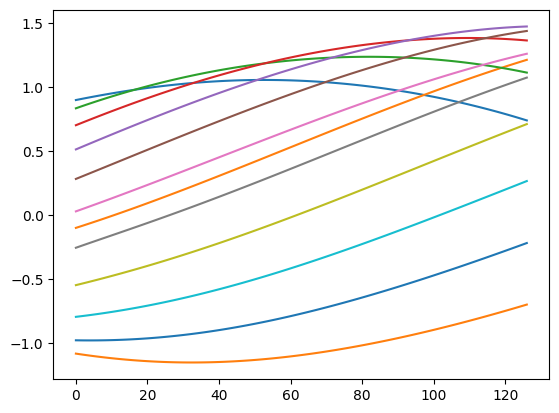

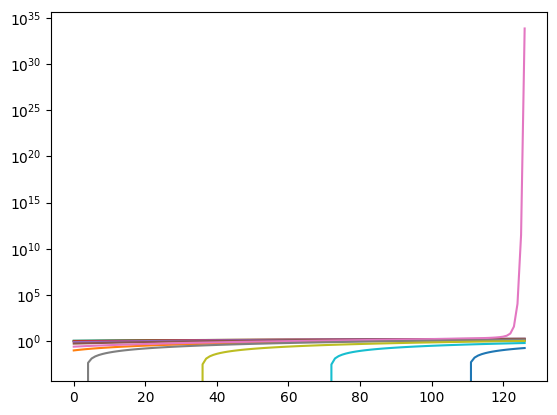

In [137]:
safe_traj = traj[:final_good_t+1]
lowers = onp.array([bound.lower for bound in safe_traj])
uppers = onp.array([bound.upper for bound in safe_traj])

plt.figure()
for var in range(len(lowers[0])):
    plt.plot(lowers[:, var])
plt.figure()
plt.yscale('log')
for var in range(len(uppers[0])):
    if var == 26 or var == 51: continue
    plt.plot(uppers[:, var])
# plt.plot(uppers[:, 26])

In [138]:
n = 4
# Find the indices of the n largest values
indices = onp.argpartition(uppers[-1], -n)[-n:]

# Sort the indices by the values
indices = indices[onp.argsort(uppers[-1][indices])]

print(indices)  # Output: indices of the n largest values
print(uppers[-1][indices[-2]])


[3 4 5 6]
1.8547524


In [139]:
final_good_y = safe_traj[-1]
Hp = jnp.hstack([jnp.eye(2), jnp.zeros((2, 10))])
final_good_x = irx.interval(Hp) @ final_good_y
print(final_good_x)
print(final_good_y[0:2])

[[(0.7406016 , 1.08634245)]
 [(1.21452892, 1.57499373)]]
[[(0.7406016 , 1.08634245)]
 [(1.21452892, 1.57499373)]]


In [ ]:
H = jnp.array([[1.0, 0.0], [0.0, 1.0]])
aux_vars = angular_sweep(N)
for i in range(len(aux_vars)):
    H = jnp.append(H, jnp.array([aux_vars[i]]), axis=0)

In [140]:
mu = 1.
def f(t, x: jnp.ndarray) -> jnp.ndarray:
    x1, x2 = x.ravel()
    return jnp.array([mu * (x1 - 1 / 3 * x1**3 - x2), x1 / mu])

F = irx.mjacif(f) 
dx = F(0, final_good_x)
print(dx)
dy = irx.interval(H) @ dx
print(dy)

[[(-0.99365085, -0.47708082)]
 [( 0.7406016 ,  1.08634245)]]


NameError: name 'H' is not defined